In [1]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from ipynb.fs.full.plotter_class import Plotter
# from ipynb.fs.full.time_series_data import TimeSeriesData
# from ipynb.fs.full.dataset_creator import SupervisedDatasetCreator
# from ipynb.fs.full.dataset_scaler_manager import DataScalerManager
# from ipynb.fs.full.lstm import LSTMModel

# class WeatherPredictionPipeline:
#     def __init__(self, 
#             data_path, 
#             file_name, 
#             input_length=24, 
#             output_length=1, 
#             epochs=20, 
#             batch_size=128,
#             learning_rate= 1e-5, #5.5e-4, 
#             n_units=256):
        
#         self.data_path = data_path
#         self.file_name = file_name
#         self.input_length = input_length
#         self.output_length = output_length
#         self.epochs = epochs
#         self.batch_size = batch_size
#         self.learning_rate = learning_rate
#         self.n_units = n_units

#         # Initialize components
#         self.ts_data = TimeSeriesData(data_path, file_name)
#         self.plotter = Plotter()
#         self.preprocessor = SupervisedDatasetCreator(input_length, output_length)
#         self.data_scaler_manager = DataScalerManager()

#     def load_and_split_data(self):
#         series = self.ts_data.df['T (degC)']
#         train, val, test = self.ts_data.train_val_test_split(series)
#         self._plot_data(train, val, test)
#         return train, val, test

#     def _plot_data(self, train, val, test):
#         """Plot training, validation, and test datasets."""
#         self.plotter.plot(train, label='Train')
#         self.plotter.plot(val, label='Val')
#         self.plotter.plot(test, label='Test')
#         self.plotter.configure(title='Weather plot (Train, val, and test)', ylabel='Temperature (°C)')
#         self.plotter.show()

#     def preprocess_data(self, train, val, test):
#         x_train, y_train = self.preprocessor.create_supervised_dataset(train.values)
#         x_val, y_val = self.preprocessor.create_supervised_dataset(val.values)
#         x_test, y_test = self.preprocessor.create_supervised_dataset(test.values)

#         print('Data Shapes:')
#         print(f'  Training set - x_train: {x_train.shape}, y_train: {y_train.shape}')
#         print(f'  Validation set - x_val: {x_val.shape}, y_val: {y_val.shape}')
#         print(f'  Test set - x_test: {x_test.shape}, y_test: {y_test.shape}')

#         return {'x_train': x_train, 'y_train': y_train,
#                 'x_val': x_val, 'y_val': y_val,
#                 'x_test': x_test, 'y_test': y_test}

#     def scale_data(self, data_in):
#         scaled_data, scaler = self.data_scaler_manager.scale_data(data_in)
#         return scaled_data, scaler

#     def build_and_train_model(self, x_train_s, y_train_s, x_val_s, y_val_s):
#         input_shape = (x_train_s.shape[1], x_train_s.shape[2])
#         lstm_model = LSTMModel(n_units=self.n_units, input_shape=input_shape, learning_rate=self.learning_rate)
#         model = lstm_model.model

#         early_stopping = EarlyStopping(patience=6, restore_best_weights=True)
#         reduce_lr = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-7)

#         history = model.fit(
#             x_train_s, y_train_s, epochs=self.epochs, batch_size=self.batch_size,
#             validation_data=(x_val_s, y_val_s), verbose=2,
#             callbacks=[early_stopping, reduce_lr]
#         )
#         self._plot_training_history(history)
#         return model

#     def _plot_training_history(self, history):
#         """Plot training and validation loss over epochs."""
#         plt.plot(history.history['loss'], label='RMSE Train')
#         plt.plot(history.history['val_loss'], label='RMSE Val')
#         plt.xlabel('Epochs')
#         plt.ylabel('RMSE')
#         self.plotter.configure(title='Epochs vs RMSE', xlabel='Epochs', ylabel='RMSE')
#         self.plotter.show()

#     def evaluate_model(self, model, x_train_s, y_train_s, x_val_s, y_val_s, x_test_s, y_test_s):
#         rmse_tr = model.evaluate(x=x_train_s, y=y_train_s, verbose=0)
#         rmse_vl = model.evaluate(x=x_val_s, y=y_val_s, verbose=0)
#         rmse_ts = model.evaluate(x=x_test_s, y=y_test_s, verbose=0)

#         print('Performance Comparison:')
#         print(f'  RMSE Train: {rmse_tr:.3f}')
#         print(f'  RMSE Val: {rmse_vl:.3f}')
#         print(f'  RMSE Test: {rmse_ts:.3f}')

#     def predict(self, x, model, scaler):
#         """Generate predictions with the trained model."""
#         y_pred_s = model.predict(x, verbose=0)
#         y_pred = scaler.inverse_transform(y_pred_s)
#         return y_pred.flatten()

#     def plot_errors(self, y_true, y_pred):
#         """Plot prediction errors."""
#         errors = y_true.flatten() - y_pred
#         plt.plot(errors)
#         plt.title("Prediction Errors")
#         plt.show()

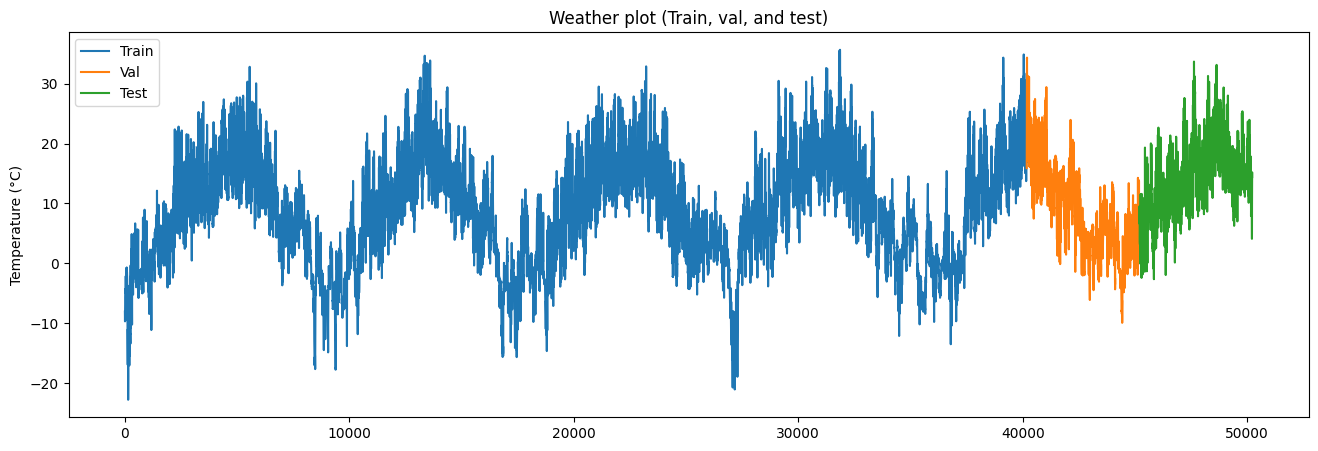

Data Shapes:
  Training set - x_train: (40154, 24, 1), y_train: (40154, 1, 1)
  Validation set - x_val: (4997, 24, 1), y_val: (4997, 1, 1)
  Test set - x_test: (4998, 24, 1), y_test: (4998, 1, 1)


c:\Sevann\UBA\LSMT-weather\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
157/157 - 37s - 233ms/step - loss: 0.0893 - val_loss: 0.0491 - learning_rate: 2.8000e-04
Epoch 2/20
157/157 - 34s - 218ms/step - loss: 0.0503 - val_loss: 0.0396 - learning_rate: 2.8000e-04
Epoch 3/20
157/157 - 36s - 226ms/step - loss: 0.0424 - val_loss: 0.0331 - learning_rate: 2.8000e-04
Epoch 4/20
157/157 - 38s - 245ms/step - loss: 0.0368 - val_loss: 0.0292 - learning_rate: 2.8000e-04
Epoch 5/20
157/157 - 36s - 227ms/step - loss: 0.0336 - val_loss: 0.0264 - learning_rate: 2.8000e-04
Epoch 6/20
157/157 - 37s - 235ms/step - loss: 0.0316 - val_loss: 0.0246 - learning_rate: 2.8000e-04
Epoch 7/20
157/157 - 36s - 229ms/step - loss: 0.0304 - val_loss: 0.0241 - learning_rate: 2.8000e-04
Epoch 8/20
157/157 - 39s - 248ms/step - loss: 0.0299 - val_loss: 0.0238 - learning_rate: 2.8000e-04
Epoch 9/20
157/157 - 37s - 232ms/step - loss: 0.0295 - val_loss: 0.0237 - learning_rate: 2.8000e-04
Epoch 10/20
157/157 - 38s - 239ms/step - loss: 0.0296 - val_loss: 0.0241 - learning_rate: 2.8000e-04

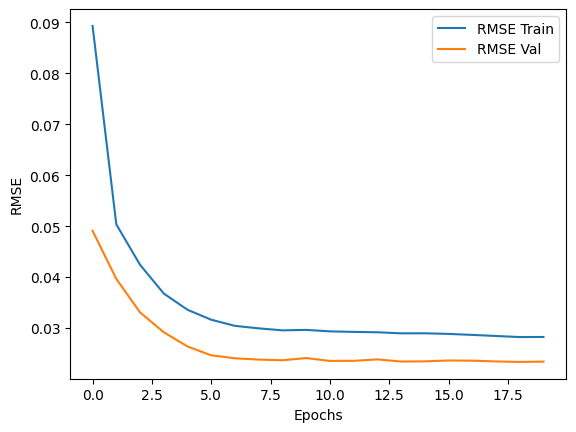

Performance Comparison:
  RMSE Train: 0.024
  RMSE Val: 0.022
  RMSE Test: 0.027


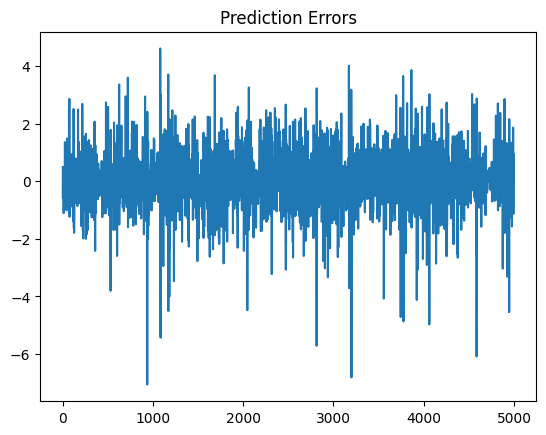

In [2]:
if __name__ == "__main__":
    pipeline = WeatherPredictionPipeline(
        data_path='./../data',
        file_name='weather_dataset_preprocesado.csv',
        input_length=24,
        output_length=1,
        epochs=20,
        batch_size=256,
        learning_rate=2.8e-4, #5.5e-4,
        n_units=256
    )

    # Load and preprocess data
    train, val, test = pipeline.load_and_split_data()
    data_in = pipeline.preprocess_data(train, val, test)
    scaled_data, scaler = pipeline.scale_data(data_in)

    # Train model
    model = pipeline.build_and_train_model(
        scaled_data['x_train'], scaled_data['y_train'],
        scaled_data['x_val'], scaled_data['y_val']
    )

    # Evaluate model
    pipeline.evaluate_model(
        model, scaled_data['x_train'], scaled_data['y_train'],
        scaled_data['x_val'], scaled_data['y_val'],
        scaled_data['x_test'], scaled_data['y_test']
    )

    # Predict and plot errors
    y_test_pred = pipeline.predict(scaled_data['x_test'], model, scaler)
    pipeline.plot_errors(data_in['y_test'], y_test_pred)